In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/leirubinstein/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


The spill incidents dataset contains records of spills of petroleum and other hazardous materials. The dataset was created on October 19, 2015, and accessed on November 9, 2024. 

The 2019 TIGER shapefile data from the US Census Bureau contains demographic and location information for all US Counties. This data was accessed on November 9, 2015.

## 3. Import libraries

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Import NY spills data and US counties data
spills = pd.read_csv("data/Spill_Incidents_20241029.csv")
counties_url = (
    "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"
)
counties = gpd.read_file(counties_url)

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [4]:
# a.
# Check the first few rows of the dataframe
spills.head(5)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# b.
# Check the data types for each column
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [6]:
# c.
# Find the unique types of spills
spills["Material Family"].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
# d.
# Find the unique county names
spills["County"].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

We obtained the first few rows of the dataframe, the data types for all of the columns, the unique values for the `Material Family` column, and the unique values for the `County` column. The `spill_date` and `received_date` columns are not in datetime format.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [8]:
# a.
# Convert column names to lowercase and remove spaces
spills.columns = spills.columns.str.replace(" ", "_")
spills.columns = spills.columns.str.lower()

In [9]:
# b.
# Convert date columns to datetime format using `pd.to_datetime`
spills["spill_date"] = pd.to_datetime(spills["spill_date"])
spills["received_date"] = pd.to_datetime(spills["received_date"])

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# a.
# Filter for spill data from Jan 1, 2023 through Oct 31, 2023
petr_23 = spills.loc[
    (spills["spill_date"] >= "2023-01-01") & (spills["spill_date"] <= "2023-10-31")
]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [11]:
# b.
# Use `.dt.month` and `dt.year` to check that the data is within the desired date rage
print(
    f"The data ranges from month {petr_23['spill_date'].dt.month.min()} to month {petr_23['spill_date'].dt.month.max()} of {petr_23['spill_date'].dt.year.unique()[0]}."
)

The data ranges from month 1 to month 10 of 2023.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [12]:
# c.
assert petr_23["spill_date"].dt.month.min() == 1
assert petr_23["spill_date"].dt.month.max() == 10
assert petr_23["spill_date"].dt.year.unique()[0] == 2023

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [13]:
# Find the number of spills per county using `.groupby` and `.size()`
spills_per_county = petr_23.groupby("county").size().reset_index(name="n_spills")
spills_per_county

,county,n_spills
0,Albany,284
1,Allegany,44
2,Bronx,187
3,Broome,99
4,Canada - Region 6,1
...,...,...
60,Washington,122
61,Wayne,47
62,Westchester,854
63,Wyoming,34


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [14]:
# a.
# Check the first few rows of the dataframe
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [15]:
# b.
# Check the datatypes for each column
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [16]:
# c.
# Check the coordinate reference system
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

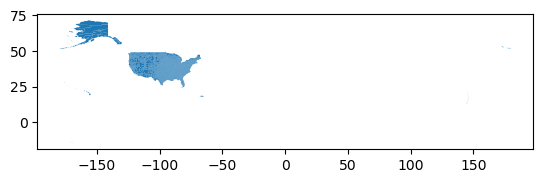

In [17]:
# d. 
# Plot the dataframe
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

We obtained the first few rows of the dataframe, the data types for each column, the coordinate reference system of the dataframe, and a visualization of its extent. `counties` includes non-contiguous states and territories.
<!-- END QUESTION -->

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [18]:
# Use `.str.lower()` to convert column names to lowercase
counties.columns = counties.columns.str.lower()

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

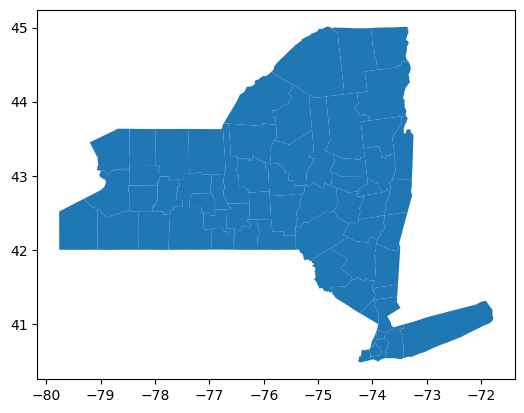

In [20]:
# Convert `statefp` to `int64`, then filter for counties in New York State
# The `statefp` code for New York is 36
ny_counties = counties.assign(statefp=counties["statefp"].astype("int64"))
ny_counties = ny_counties[ny_counties["statefp"] == 36]

# Plot counties in New York
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [21]:
# a.
# Find the unique county names
ny_counties["name"].unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [22]:
# b.
# Find the unique county names
spills_per_county["county"].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Canada - Region 6',
       'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango',
       'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie',
       'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton',
       'Herkimer', 'Jefferson', 'Kings', 'Lewis', 'Livingston', 'Madison',
       'Monroe', 'Montgomery', 'Nassau', 'New Jersey - Region 2',
       'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange',
       'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens', 'Rensselaer',
       'Richmond', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie',
       'Schuyler', 'Seneca', 'St Lawrence', 'Steuben', 'Suffolk',
       'Sullivan', 'Tioga', 'Tompkins', 'Tuscarora Indian Reservation',
       'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester',
       'Wyoming', 'Yates'], dtype=object)



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [23]:
# Use `np.setdiff1d` to find the county names only in `spills_per_county`
diff_names_spills = np.setdiff1d(
    (spills_per_county["county"].unique()), (ny_counties["name"].unique())
)
diff_names_spills

array(['Canada - Region 6', 'New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [24]:
# Use `np.setdiff1d` to find the county names only in `ny_counties`
diff_names_ny = np.setdiff1d(
    (ny_counties["name"].unique()), (spills_per_county["county"].unique())
)
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [25]:
# e.
# Use bracket indexing to find the number of values in `n_spills` for 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county["county"] == "Tuscarora Indian Reservation"][
    "n_spills"
].values[0]

1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [26]:
# Update St Lawrence to match the county name in `ny_counties`
spills_per_county.loc[spills_per_county["county"] == "St Lawrence", "county"] = (
    "St. Lawrence"
)

In [ ]:
assert not (spills_per_county["county"] == "St Lawrence").any()

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [27]:
# a.
# Rename `name` to `county` for merging
ny_counties.rename(columns={"name": "county"}, inplace=True)

In [28]:
# b.
# Merge the geodataframe with the `spills_per_county` while maintaining geometries for plotting
ny_counties = gpd.GeoDataFrame(
    pd.merge(spills_per_county, ny_counties, on="county", how="inner"),
    geometry="geometry",
)


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [29]:
# c.
# Use `.loc` to find the index position of Niagara county and `.at` to update the value
ny_counties.loc[ny_counties["county"] == "Niagara"]
ny_counties.at[31, "n_spills"] = 124

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



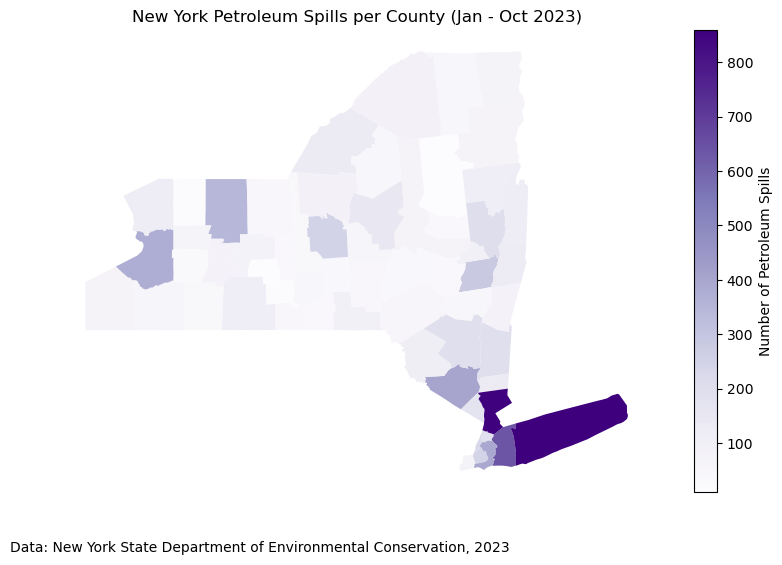

In [30]:
# a.

# Initialize figure and axes
fix, ax = plt.subplots(figsize = (10,6))

# Remove axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('New York Petroleum Spills per County (Jan - Oct 2023)', 
              fontsize = 12)

# Add data
ny_counties.plot(ax = ax,
                 column = 'n_spills',
                 legend = True,
                 cmap = 'Purples',
                 legend_kwds = {'label': 'Number of Petroleum Spills'}
                 )

plt.figtext(0.1, 0.01, "Data: New York State Department of Environmental Conservation, 2023", ha="left", fontsize=10)


plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [31]:
# Find the top 3 spills using `.sort_values`
top3_counties = ny_counties.sort_values(by="n_spills", ascending=False).head(3)
top3_counties

,county,n_spills,statefp,countyfp,countyns,geoid,geoidfq,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
51,Suffolk,859,36,103,00974149,36103,0500000US36103,Suffolk County,06,H1,G4020,408,35620,35004,A,2359277313,3787417976,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184..."
59,Westchester,854,36,119,00974157,36119,0500000US36119,Westchester County,06,H1,G4020,408,35620,35614,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985..."
29,Nassau,635,36,059,00974128,36059,0500000US36059,Nassau County,06,H1,G4020,408,35620,35004,A,736960644,437290665,+40.7296118,-073.5894144,"POLYGON ((-73.78019 40.82640, -73.77498 40.830..."


This map visualizes the number of petroleum spills per county in New York State, from January 1, 2023 to October 31, 2023. The top 3 counties with the most spills were Suffolk (n = 859), Westchester (n = 854), and Nassau (n = 635). 